In [39]:
import pandas as pd
import seaborn as sns

In [40]:
df = pd.read_csv("weather_data.csv")

In [41]:
df.head()

,temp,max_temp,wind_speed,cloudcover,precip,humidity,class
0,29.90,37.00,23.00,58.60,146.00,83.86,1
1,93.04,82.41,63.44,102.42,192.07,129.30,1
2,87.13,98.82,72.29,122.12,191.80,142.25,1
3,92.12,72.39,73.84,96.50,196.53,150.42,1
4,92.64,76.03,67.13,92.61,191.76,126.61,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        5040 non-null   float64
 1   max_temp    5040 non-null   float64
 2   wind_speed  5040 non-null   float64
 3   cloudcover  5040 non-null   float64
 4   precip      5040 non-null   float64
 5   humidity    5040 non-null   float64
 6   class       5040 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 275.8 KB


In [43]:
df.describe()

,temp,max_temp,wind_speed,cloudcover,precip,humidity,class
count,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000
mean,74.972304,82.296603,65.832542,99.310198,249.592024,118.526250,0.595238
std,14.777671,14.986585,17.802253,32.136833,245.811811,24.517423,0.490895
min,12.800000,20.100000,0.000000,0.000000,0.000000,15.960000,0.000000
25%,67.950000,74.867500,56.800000,72.622500,56.470000,102.177500,0.000000
50%,76.585000,83.990000,66.340000,104.645000,173.340000,124.170000,1.000000
75%,85.362500,92.815000,75.855000,126.082500,382.677500,137.022500,1.000000
max,103.240000,112.270000,135.690000,160.900000,1325.510000,161.900000,1.000000


<AxesSubplot:xlabel='temp', ylabel='Count'>

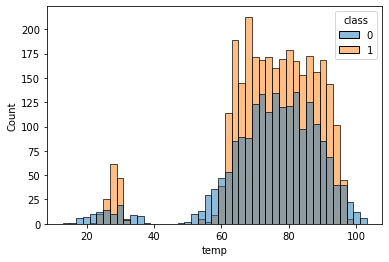

In [44]:
sns.histplot(data=df,x="temp",hue="class")

<AxesSubplot:xlabel='precip', ylabel='Count'>

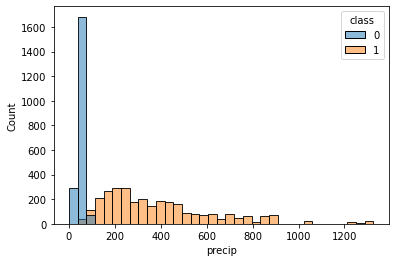

In [45]:
sns.histplot(data=df,x="precip",hue="class")

<AxesSubplot:xlabel='humidity', ylabel='Count'>

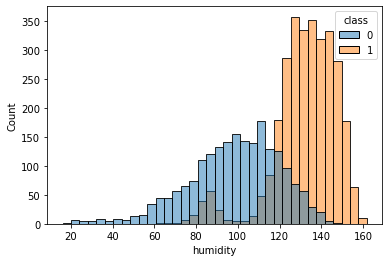

In [46]:
sns.histplot(data=df,x="humidity",hue="class")

In [47]:
data = df.to_numpy()

In [48]:
X = data[:,:-1]

In [49]:
y = data[:,-1]

In [50]:
X

array([[ 29.9 ,  37.  ,  23.  ,  58.6 , 146.  ,  83.86],
       [ 93.04,  82.41,  63.44, 102.42, 192.07, 129.3 ],
       [ 87.13,  98.82,  72.29, 122.12, 191.8 , 142.25],
       ...,
       [ 76.4 ,  82.69,  79.23,  58.95,  65.84, 122.76],
       [ 61.03,  74.17,  70.44,  61.39,  64.09, 106.96],
       [ 85.19,  64.06,  73.84,  56.96,  71.45, 109.65]])

In [51]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
clf1 = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)

In [55]:
clf2 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)

In [56]:
clf3 = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [57]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [58]:
pred1 = clf1.predict(X_test)

In [59]:
accuracy1 = accuracy_score(y_test, pred1)
accuracy1

0.9894179894179894

In [60]:
clf2.fit(X_train,y_train)
pred2 = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, pred2)
accuracy2

0.9920634920634921

In [61]:
clf3.fit(X_train,y_train)
pred3 = clf3.predict(X_test)
accuracy3 = accuracy_score(y_test, pred3)
accuracy3

0.9874338624338624

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        5040 non-null   float64
 1   max_temp    5040 non-null   float64
 2   wind_speed  5040 non-null   float64
 3   cloudcover  5040 non-null   float64
 4   precip      5040 non-null   float64
 5   humidity    5040 non-null   float64
 6   class       5040 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 275.8 KB


In [63]:
df.head()

,temp,max_temp,wind_speed,cloudcover,precip,humidity,class
0,29.90,37.00,23.00,58.60,146.00,83.86,1
1,93.04,82.41,63.44,102.42,192.07,129.30,1
2,87.13,98.82,72.29,122.12,191.80,142.25,1
3,92.12,72.39,73.84,96.50,196.53,150.42,1
4,92.64,76.03,67.13,92.61,191.76,126.61,1


In [64]:
df["precip_value"] = df["precip"]/100

In [65]:
df.head()

,temp,max_temp,wind_speed,cloudcover,precip,humidity,class,precip_value
0,29.90,37.00,23.00,58.60,146.00,83.86,1,1.4600
1,93.04,82.41,63.44,102.42,192.07,129.30,1,1.9207
2,87.13,98.82,72.29,122.12,191.80,142.25,1,1.9180
3,92.12,72.39,73.84,96.50,196.53,150.42,1,1.9653
4,92.64,76.03,67.13,92.61,191.76,126.61,1,1.9176


In [66]:
X1 = df.iloc[:,[0,1,2,3,5,7]]

In [67]:
X1

,temp,max_temp,wind_speed,cloudcover,humidity,precip_value
0,29.90,37.00,23.00,58.60,83.86,1.4600
1,93.04,82.41,63.44,102.42,129.30,1.9207
2,87.13,98.82,72.29,122.12,142.25,1.9180
3,92.12,72.39,73.84,96.50,150.42,1.9653
4,92.64,76.03,67.13,92.61,126.61,1.9176
...,...,...,...,...,...,...
5035,61.43,77.45,80.24,77.38,124.24,0.8132
5036,72.26,78.98,47.48,73.92,113.09,0.6772
5037,76.40,82.69,79.23,58.95,122.76,0.6584
5038,61.03,74.17,70.44,61.39,106.96,0.6409


In [68]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [69]:
clf2 = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [70]:
clf2.fit(X1_train,y1_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [71]:
pred1 = clf2.predict(X1_test)

In [72]:
accuracyX = accuracy_score(y1_test, pred1)
accuracyX

0.9920634920634921

In [73]:
clf2.predict([[73.3,82.3,7.1,0,0,0.87]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [74]:
df.corr()

,temp,max_temp,wind_speed,cloudcover,precip,humidity,class,precip_value
temp,1.000000,0.591635,0.479222,0.269447,0.023138,0.292599,0.017544,0.023138
max_temp,0.591635,1.000000,0.465889,0.211660,0.012484,0.240635,-0.038405,0.012484
wind_speed,0.479222,0.465889,1.000000,0.282142,0.190300,0.331329,0.130629,0.190300
cloudcover,0.269447,0.211660,0.282142,1.000000,0.565175,0.744437,0.745362,0.565175
precip,0.023138,0.012484,0.190300,0.565175,1.000000,0.517426,0.666564,1.000000
humidity,0.292599,0.240635,0.331329,0.744437,0.517426,1.000000,0.676125,0.517426
class,0.017544,-0.038405,0.130629,0.745362,0.666564,0.676125,1.000000,0.666564
precip_value,0.023138,0.012484,0.190300,0.565175,1.000000,0.517426,0.666564,1.000000


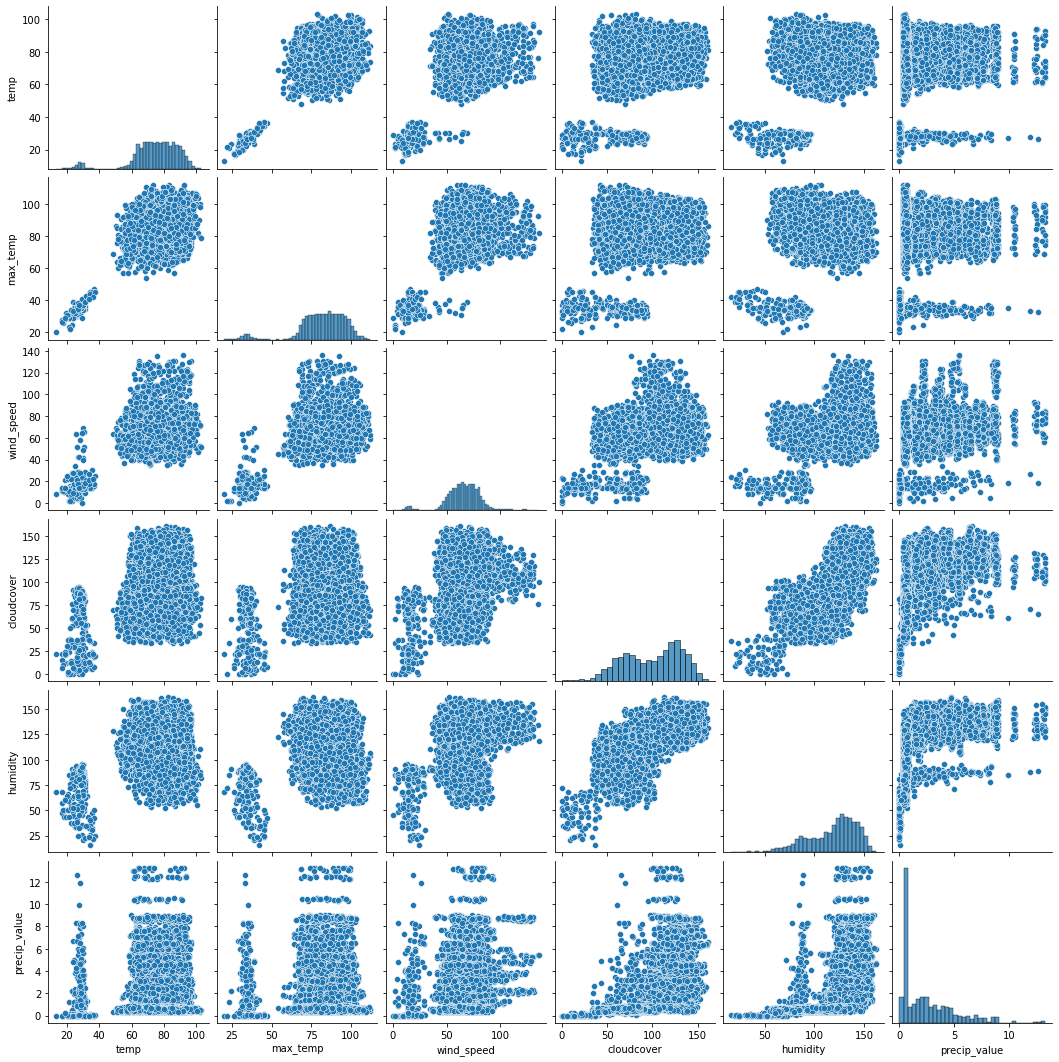

In [75]:
sns.pairplot(X1)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y1_test,pred1))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       596
         1.0       1.00      0.99      0.99       916

    accuracy                           0.99      1512
   macro avg       0.99      0.99      0.99      1512
weighted avg       0.99      0.99      0.99      1512



<AxesSubplot:xlabel='precip_value', ylabel='Count'>

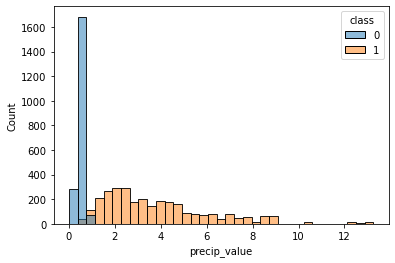

In [78]:
sns.histplot(data=df,x="precip_value",hue="class")